# Encoding (EDA technique)

Variables can be classified as

1. Quantitative - discrete, continuous
2. Qualitative - nominal, ordinal, binomial i.e. Categorical variables

Machine Learning only works with numbers so you need to convert categorical variables to numbers using ENCODING

2 Types of Encoding
1. One hot encoding
2. Label encoding - for catogorical target variables

__One hot encoding__ - One is used to encode all the features.

The column to be encoded will be split into the number of classes in that column (to be encoded) and the particular class will be represented as a 1 when it occurs while other split column on the same row will be 0.

Syntax for One hot encoding:

pd.get_dummes(dfname['columnname'])  i.e. pd.get_dummies(thecolumntobeencoded)

__Label Encoding__- Used for categorical target variables

It does not result in additional columns but instead, maps a number to each of the label.

So while one hot encoding will result in additional columns, the label encoding will retain the single column

Syntax for Label encoder
- import it from the sklearn preprocessing package
- initialize the label enoder and pass the target column to be encoded in the fit_transform



# Classification

Is a supervised machine learning approach, used when the target/dependent variable (y) is of categorical type.

Example: Tall/Short/Medium, Yes/No, Grades of students, sick/healthy

#### Algorithms
1. Logistic Regression
2. K Nearest Neighbors
3. Decision Trees
4. Support Vector Machines
5. Naive Bayes Classifier

# 1. Logistic Regression

It's widely used to predict binary outcomes for a given set of independent variables. It's based on linear regression/straight line equation but log was applied to turn the line shape to an 'S' shape.

The dependent variabe outcome is discrete i.e y=0 or y=1

It calculates the probablity of the observation belonging to one of the classes i.e. 1 or 0, pass or fail, sick or healthy

e.g. if the probablity of student passing an exam is 0.4 --> Fail
1 - 0.4 = 0.6 --> Pass
A threshold is set and above the threshold --> 1 or yes, below the threshold --> 0 or no

**It can be used for target variable with 2 - 3 classes but doesn't work well beyond that**

The probability distribution of output is restricted to 1 or 0. This is called __sigmoid probability__/logistic funtion/S curve

#### Application:
- Loan approval
- Spam filtering
- Customer segment
- Exam results



See further down in this notebook for logistic regression code

# 2. K Nearest Neighbors

1. Determine k value - when your target variable has even number of classes, use an odd numbered k value and when the target variable has odd number of classes, use even number k value. i.e. if you have 3 classes, use k=4
2. The distance between the new data point and all the other datapoints is computed. There are many types of distance cals e.g. Euclidean, 
3. Distances are ranked in acsending order. The closest neighbors will be chosen based on the k value
4. Based on majority class lable, the label for the new data point is assigned.

k value is a hyperparameter so you need to try different values to see which value gives the best result. __Don't choose k value higer than 15 or 20__ to avoid increasing your prediction error

### 1. Import dataset

In [1]:
# import inbuilt dataset from sklearn
from sklearn.datasets import load_iris

iris = load_iris()

type(iris)

sklearn.utils.Bunch

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# check the keys for the dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# get the column names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 2. Convert it to a dataframe

In [5]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# add the target/dependent variable column
iris_df['class'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. Check for null values

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

There are no null values.

### 4. Visualize the target variable

This is important as you need to ensure that all the classes are equal to avoid bias towards any of the class.

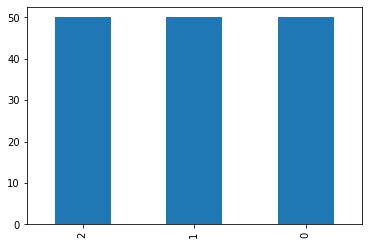

In [8]:
iris_df['class'].value_counts().plot.bar()

### 5. Split X and y

In [9]:
X = iris_df.drop('class', axis=1)
y = iris_df['class']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 6. Split dataset into train and test sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### 7. Build Model

The target variable has 3 classes so we will start with k=4

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the classifier object 
knn = KNeighborsClassifier(n_neighbors=4)  # n_neighbors is the k value=4

# fit the model on the data. Since it' supervised learning, you pass both the X and y train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### 8. Predict

In [12]:
y_test_knn = knn.predict(X_test)

### 9. Evaluate the model prediction accuracy

In [13]:
from sklearn import metrics

print('Accuracy score for test data in KNN model is:')
print(metrics.accuracy_score(y_test, y_test_knn))

Accuracy score for test data in KNN model is:
0.9333333333333333


The model is __93.33%__ accurate on the testing data. To ensure the model is not overfitting, we will check the training data accuracy also

### 10. Quality Check

1. Compare train and test data accuracy scores
2. __Confusion matrix__ - tells us how well our model classified the data point. It is used for a 2 class classification problem

#### 1. Compare train and test data accuracy scores

In [14]:
# training data accuracy
y_train_knn = knn.predict(X_train)

print('Accuracy score for train data in KNN model is:')
print(metrics.accuracy_score(y_train, y_train_knn))

Accuracy score for train data in KNN model is:
0.9523809523809523


The train accuracy score is 95.23% which is about the train accuracy so this is __an appropriate model__. Not over fitted or under fitted.

### Confusion matrix

                     cancer | No cancer  - predicted value
    Actual value     10(TP) | 20(FN)  - FN is a Type II error (more harmful/costly)
                     30(FP) | 40(TN)  - FP is a Type I error
        
Baed on the values in the confusion matrix, we have 4 different metrics for evaluating a clasification model.

Accuracy (overall): 
        
        = TP + TN/(TP + TN + FP + FN)

Precision (vertical): 
        
        = TP/(TP + FP) -- how precisely your model identifies sick patients ( positive class)

        = TN/ (TN + FN) -- how precisely your model identifies healthy people (negative class)

Recall (horizontal direction): 
        
        = TP/ (TP + FN) -- positive class 
        = TN/ (TN + FP) -- negative class

F1 Score:

        = 2 * Recall * Precision / Recall + Precision
        
There will be times when the precision and recall will not make sense for the problem so F1 score is used. It is the mean of the precision and recall. The F1 score tells you how well your model prediction is. It combines precision and recall.

#### 2. Confusion matrix - classification report

In [15]:
from sklearn.metrics import classification_report

print('Classifiction report for the test data:')
print(classification_report(y_test, y_test_knn))

Classifiction report for the test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



You get the precision, recall, and f1-score for the 3 classes
Accuracy of 1 means that the model is correclty predicting all the classes
'support' tells us how many records were used to compute the values of precision, recall, and f1-score

# End of KNN

# Logistic Regression

In [16]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the object
log_reg = LogisticRegression()

# model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# predict
y_test_pred = log_reg.predict(X_test)

# evaluate the prediction
from sklearn import metrics

print('Accuracy score for test data:')
print(metrics.accuracy_score(y_test, y_test_pred))

Accuracy score for test data:
0.9333333333333333


# End of Logistic Regression

# 3. Decision Tree 

Decision tree is a classification algorithm which tried to make tree like structure using our features in which the internal node represents the test on an attribute.

- Each __branch__ represents the outcome of the test
- Each __leaf__ node represents the class label
- A __path__ from the root to leaf represents classification rules

You have the 
Root node --> Decision node or Terminal node

-- Decision node --> Terminal node

#### Decision Tree Formation
1. __Entropy__ - measures the _impurity_ of a collection of examples i.e. how much are the features not able to express the target
2. __Information Gain__ - is the expected reduction in entropy caused by partitioning the examples on an attribute i.e. how well the features predicts the target

Entropy and Information gain are inversely proportional to each other.

Information gain keeps increasing as it moves to a terminal node while entopy keeps decreasing as it moves to a terminal node

Information Gain - Increases towards terminal node

Entropy - Decreases towards terminal node

#### One main disadvantage of decision tree is __overfitting__
So to overcome this limitation, we use __pruning__ to limit the max depth.

In [18]:
import pandas as pd
import matplotlib.pyplot as plot

Using the horse dataset, predict if the horse lived, died, or was euthanized

In [19]:
horse_df = pd.read_csv('horse.csv')
horse_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [20]:
# check the shape
horse_df.shape

(299, 28)

In [21]:
# check column names
horse_df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [22]:
# check the data types to know what you are working with
horse_df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [23]:
# check the independent variable classes
horse_df.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

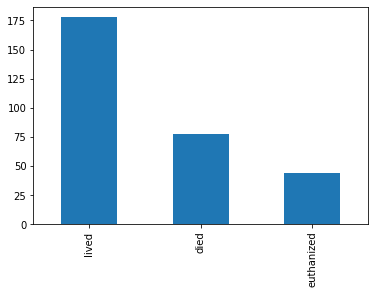

In [24]:
# check the number of observations/records in the target classes
horse_df.outcome.value_counts().plot.bar()

As can be seen from above, the lived class is significantly more than say euthanized so the model may tend to be biased towards returning 'lived' when the class should be 'euthanized' so you need to 

1. collect data that are about same records for all target classes when or
2. the 'died' and 'euthanized' classes need to be __over sampled__ <- Read up on how to do this

NOte: undersampling can be used if you want to reduce the accuracy by reducing the number of observations sampled.

## Encode the independent variables

Using some of the independent variables:

In [25]:
category_variables = ['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
     'abdomen','abdomo_appearance', 'surgical_lesion','cp_data']

# perform one hot encoding on various features in my dataset
horse_encoded_df = pd.get_dummies(horse_df[category_variables])

horse_encoded_df.shape

(299, 56)

_Notice that there is now 56 columns from the 28 columns we started with._

## Perform label encoding on the target column

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(horse_df['outcome'])
y

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [27]:
horse_df['outcome']

0            died
1      euthanized
2           lived
3            died
4            died
          ...    
294    euthanized
295    euthanized
296          died
297         lived
298    euthanized
Name: outcome, Length: 299, dtype: object

Notice from the 2 cells above that died has been assigned as 0, euthanized as 1, lived as 2

## Split data into train and test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(horse_encoded_df, y, test_size=0.2, random_state=21)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 56)
(239,)
(60, 56)
(60,)


In [29]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

## Build model using Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()  # instantiating the estimator object
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

## Evaluate the classification model

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, y_test)
print('The prediction accuracy of the Decision Tree model on testing data is:', accuracy)

The prediction accuracy of the Decision Tree model on testing data is: 0.6


In [32]:
y_pred_train = dt_model.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print('The prediction accuracy of the Decision Tree model on training data is:', accuracy)

The prediction accuracy of the Decision Tree model on training data is: 0.99581589958159


Notice that the accuracy of the train data is 99.58% while that of the testing datset is 64.33%. This is a typical case of __overfitting__ and to fix this, we need to prune the tree 

## Prune the decision tree to avoid overfitting

To prune, specify the max_depth when initializing the estimator object

In [33]:
#initialize the estimator object 
dt_prune = DecisionTreeClassifier(max_depth=4) 
dt_prune.fit(X_train,y_train)
y_predict = dt_prune.predict(X_test)

In [34]:
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.5666666666666667


In [35]:
y_pred_train = dt_prune.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  0.7447698744769874


Notice that the accuracy for both trees reduced but the difference is no longer as much as before

# End Decision Tree